In [234]:
# List all files in folder data_collection
import os
import sys

# Print all files with 1, 2., .. and create list
def list_files_with_number():
    files = os.listdir('data_collection')
    for i, file in enumerate(files):
        print(f'{i+1}. {file}')
    return files

# Print using function
files = list_files_with_number()

# Input - Which file to open
file_number = int(input('Which file to open? '))

# Set file name based of list
file_name = files[file_number-1]
print(file_name)

1. STUMBL_WALK_1.csv
2. WALK_1.csv
3. EPPILEPTIC_SHAKE_1_0M.csv
4. WALK_2.csv
5. FALL_1_0M.csv
6. AMBIENT_1.csv
7. DROP_BAG_1.csv
8. ehde.csv
9. STILL_1.csv
ehde.csv


In [235]:
import pandas as pd
import os

# Define the correct file path
file_path = os.path.join("data_collection", file_name)  # Adjust if needed

# Read the CSV file line-by-line, keeping order intact
all_rows = []  # Stores all rows as lists
max_columns = 0  # Tracks the longest row

# Read file manually to handle variable-length rows
with open(file_path, "r") as file:
    for line in file:
        row = line.strip().split(",")  # Split row by commas
        # print(len(row))
        all_rows.append(row)  # Store the row as a list
        max_columns = max(max_columns, len(row))  # Track the longest row

# Convert to DataFrame, ensuring alignment by padding shorter rows
data = pd.DataFrame([row + ["NaN"] * (max_columns - len(row)) for row in all_rows])

# Display DataFrame shape (optional)
print("Data shape:", data.shape)

# Display first few rows (optional)
print(data.head())

Data shape: (3, 176)
    0     1     2     3     4     5     6     7     8     9    ...   166  \
0  9.37  9.40  9.40  9.40  9.42  9.41  9.41  9.40  9.37  9.38  ...  9.39   
1  9.37  9.40  9.38  9.40  9.39  9.39  9.39  9.40  9.42  9.42  ...  9.42   
2  9.41  9.40  9.39  9.40  9.42  9.40  9.40  9.38  9.40  9.37  ...  9.43   

    167   168   169   170   171   172   173   174   175  
0  9.37  9.40  9.38  9.39  9.41  9.40  9.39  9.41  9.39  
1  9.37  9.39  9.38  9.41  9.41  9.41  9.41  9.38  9.38  
2  9.40  9.41  9.41  9.36  9.37  9.37  9.44  9.43   NaN  

[3 rows x 176 columns]


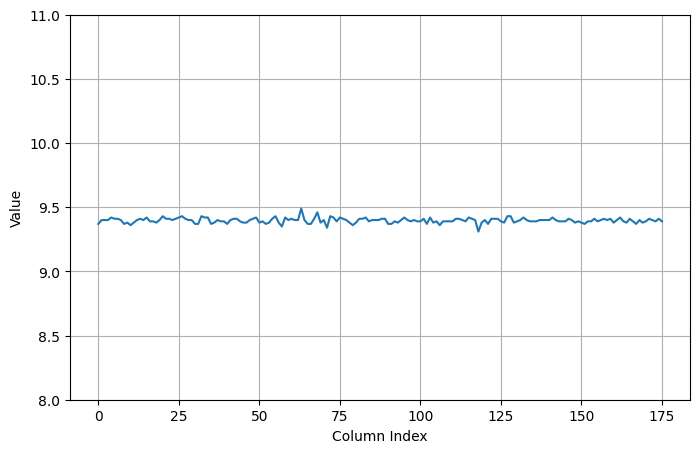

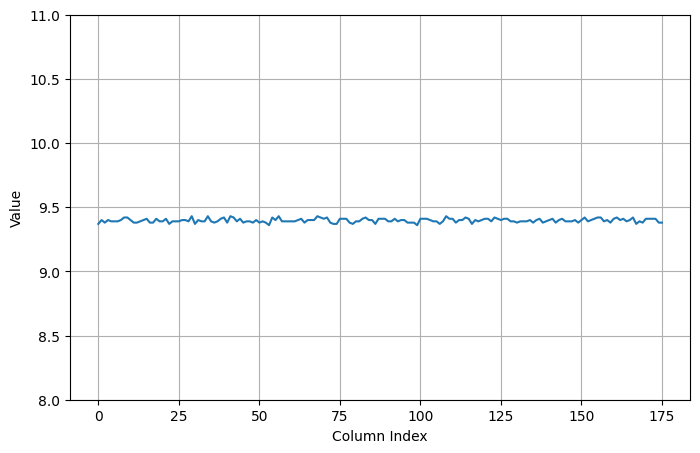

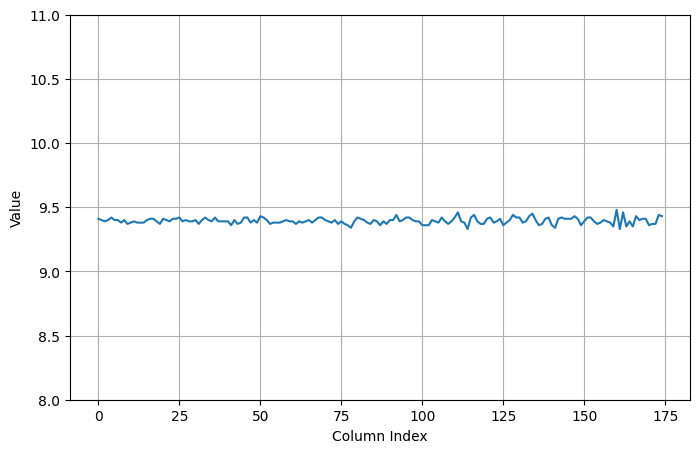

In [236]:
import matplotlib.pyplot as plt

# Convert data to numeric
data = data.apply(pd.to_numeric, errors='coerce')

for i in range(data.shape[0]):
    plt.figure(figsize=(8, 5))  # Optional: Adjust figure size
    plt.plot(data.iloc[i, :], linestyle="-")  # Removed markers
    plt.xlabel('Column Index')
    plt.ylabel('Value')

    # Dynamically adjust the y-axis based on min/max of the row
    plt.ylim(8, 11)  # Optional: Set fixed y-axis range

    plt.grid(True)  # Optional: Add grid for better visualization
    plt.show()

